In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def display(img, cmap="gray"): # görüntüyü göstermek için fonksiyon
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap)
    plt.show()

In [58]:
py = cv2.imread(r"opencv_2\media\python2.jpg",0)
language = cv2.imread(r"opencv_2\media\diller.jpg", 0)

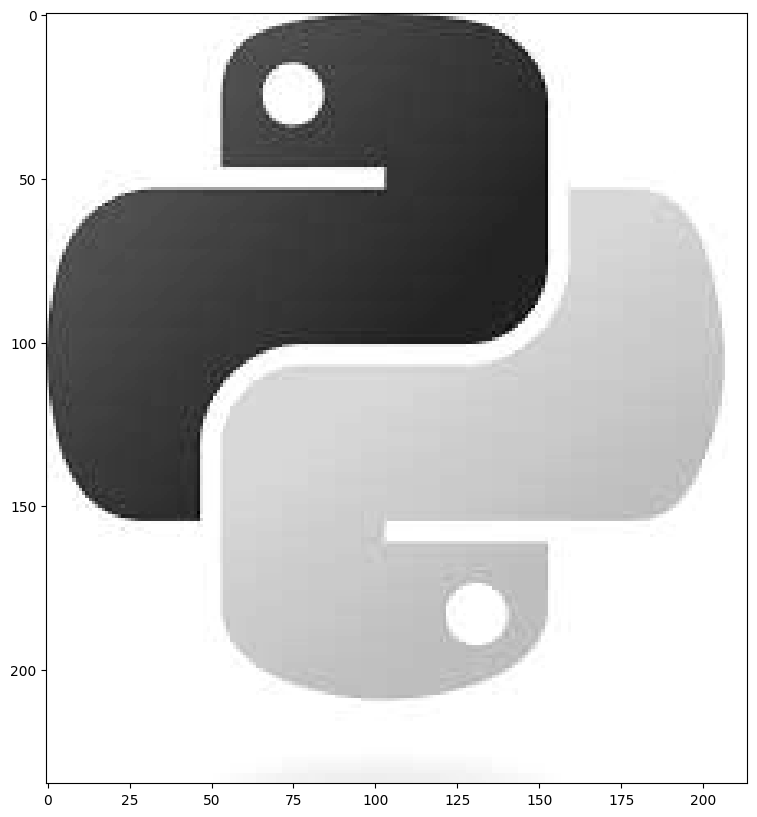

In [59]:
display(py)

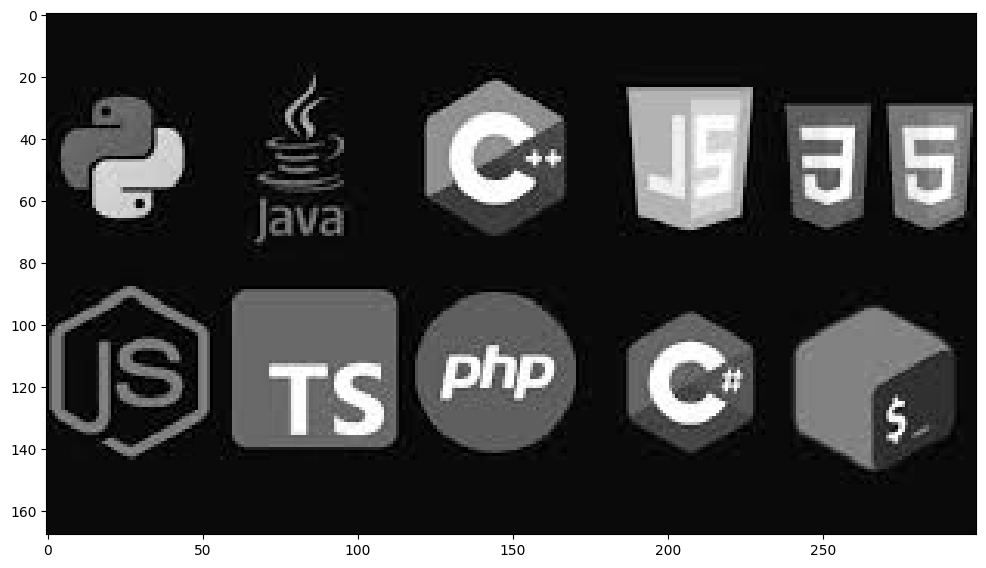

In [60]:
display(language)

###Brute Force Detection with ORB Descriptors

In [61]:
orb = cv2.ORB_create() # orb nesnesi oluşturuldu

In [62]:
kp1, dest1 = orb.detectAndCompute(py, None) # py resmi için köşe ve açıklık noktaları bulundu
kp2, dest2 = orb.detectAndCompute(language, None) # language resmi için köşe ve açıklık noktaları bulundu

In [63]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
# BFMatcher nesnesi oluşturuldu ve hamming mesafesi ile eşleşmeleri bulmak için kullanıldı

In [64]:
matches = bf.match(dest1, dest2) # eşleşmeleri bulundu

In [65]:
matches = sorted(matches, key=lambda x:x.distance) # eşleşmeleri sıralandı

In [66]:
scratching = cv2.drawMatches(py, kp1, language, kp2, matches[:25], None, flags=2) # eşleşmeleri çizdirildi

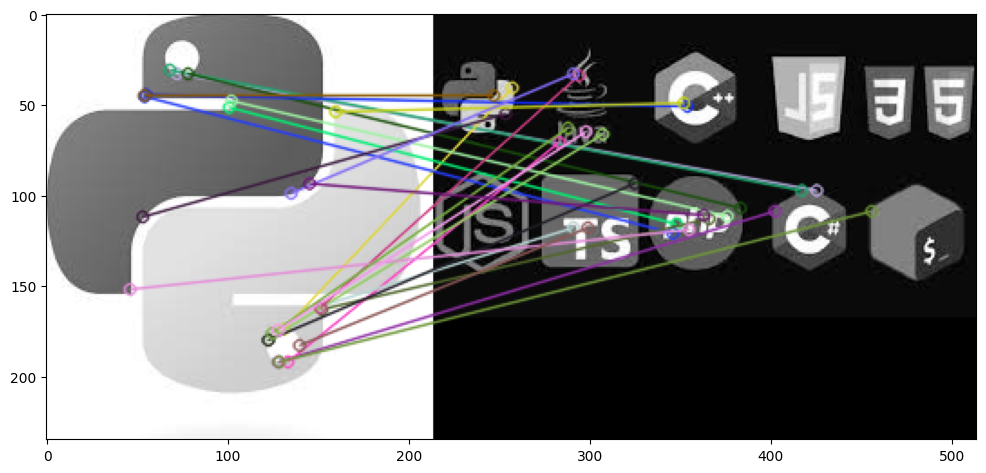

In [67]:
display(scratching)

Brute-Force Matching width SIFT Descriptors and Ratio Test

In [68]:
sift = cv2.SIFT_create() # sift nesnesi oluşturuldu

In [69]:
kp1, dest1 = sift.detectAndCompute(py, None)
kp2, dest2 = sift.detectAndCompute(language, None)

In [70]:
bf = cv2.BFMatcher()
matches = bf.knnMatch(dest1, dest2, k=2)

In [71]:
matches # en iyi 2 eşleşmeyi verir

((< cv2.DMatch 0000022EB02821D0>, < cv2.DMatch 0000022EB0281150>),
 (< cv2.DMatch 0000022EAFE739F0>, < cv2.DMatch 0000022EB256DD90>),
 (< cv2.DMatch 0000022EB256E110>, < cv2.DMatch 0000022EB259C5F0>),
 (< cv2.DMatch 0000022EB259CB30>, < cv2.DMatch 0000022EB259EFD0>),
 (< cv2.DMatch 0000022EB259F730>, < cv2.DMatch 0000022EB259FAB0>),
 (< cv2.DMatch 0000022EB259F1F0>, < cv2.DMatch 0000022EB29E41D0>),
 (< cv2.DMatch 0000022EB29E45B0>, < cv2.DMatch 0000022EB29E4130>),
 (< cv2.DMatch 0000022EB29E6410>, < cv2.DMatch 0000022EB29E60B0>),
 (< cv2.DMatch 0000022EB29E5EF0>, < cv2.DMatch 0000022EB29E69D0>),
 (< cv2.DMatch 0000022EB29E6870>, < cv2.DMatch 0000022EB29E67B0>),
 (< cv2.DMatch 0000022EB29E4510>, < cv2.DMatch 0000022EB29E6810>),
 (< cv2.DMatch 0000022EB29E6890>, < cv2.DMatch 0000022EB29E6730>),
 (< cv2.DMatch 0000022EB29E6790>, < cv2.DMatch 0000022EB29E6950>),
 (< cv2.DMatch 0000022EB29E6A50>, < cv2.DMatch 0000022EB29E5ED0>),
 (< cv2.DMatch 0000022EB29E40D0>, < cv2.DMatch 0000022EB29E6A1

In [72]:
good = []

for match1, match2 in matches: # eşleşmeleri karşılaştırır
    if match1.distance < 0.75*match2.distance: # eşleşmelerin mesafesi 0.75'ten küçükse
        good.append([match1])
        

In [73]:
scratching2 = cv2.drawMatchesKnn(py, kp1, language, kp2, good, None, flags=2)

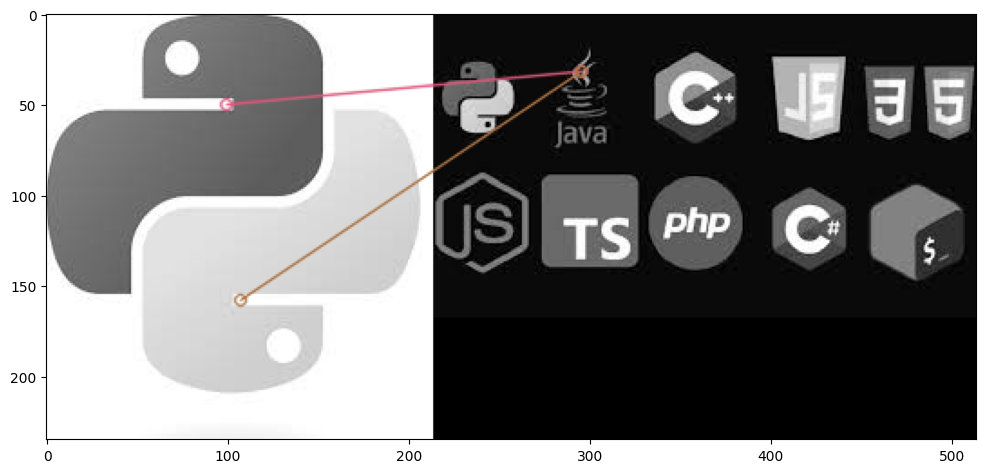

In [74]:
display(scratching2)

FLANN based Matcher

In [75]:
sift = cv2.SIFT_create() # sift nesnesi oluşturuldu

In [76]:
kp1, dest1 = sift.detectAndCompute(py, None)
kp2, dest2 = sift.detectAndCompute(language, None)

In [77]:
FLANN_INDEX_KDTRREE = 0
index_params = dict(algorithm=FLANN_INDEX_KDTRREE, trees=5)
search_params = dict(checks=50)

In [78]:
flann = cv2.FlannBasedMatcher(index_params, search_params)

In [79]:
matches = flann.knnMatch(dest1, dest2, k=2)

In [85]:
good = []

for i, (match1, match2) in enumerate(matches):
    if match1.distance < 0.7*match2.distance:
        good.append([match1])

scratching3 = cv2.drawMatchesKnn(py, kp1, language, kp2, good, None, flags=2)

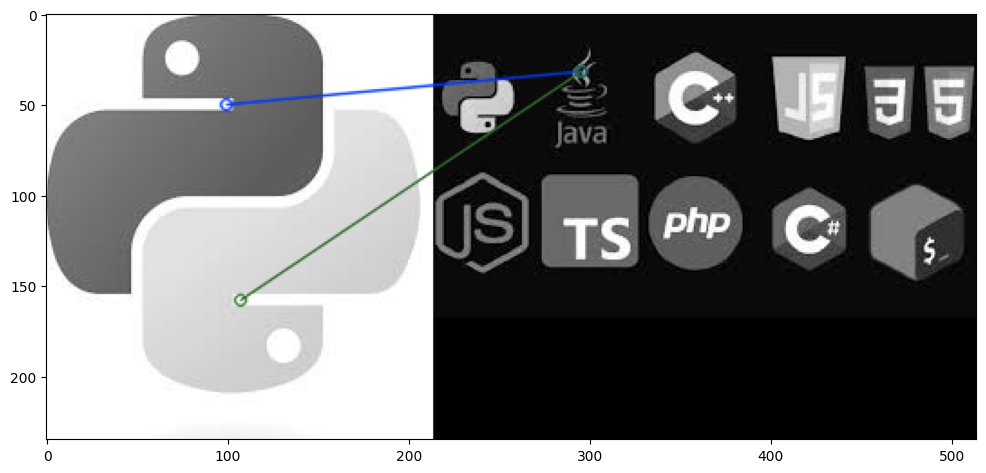

In [86]:
display(scratching3)